# **1. Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report


# **2. Memuat Dataset dari Hasil Clustering**

In [ ]:
# Memuat file csv
telco_df = pd.read_csv('/content/telco_cluster_label.csv')

# Menampilkan 10 baris pertama untuk memastikan data telah dimuat dengan benar
telco_df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CustomerType
5411,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0,24,5
3795,1,0,0,0,0,1,0,1,0,0,0,0,2,0,0,1,2,3,912,1
4334,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,2,3,838,1
4227,1,0,1,1,5,1,0,0,2,2,0,2,2,2,2,0,0,3,5542,0
104,1,0,1,0,5,1,2,1,0,2,2,2,2,2,2,1,0,5,7611,4
3630,0,0,0,0,0,1,0,2,1,1,1,1,1,1,0,0,0,0,85,5
663,1,0,1,1,5,1,2,0,2,2,0,0,0,2,2,1,3,3,4459,6
980,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,1,0,0,413,5
5050,1,0,1,0,5,1,2,1,2,0,2,0,2,2,2,1,1,5,6981,4
5622,1,0,0,0,1,1,2,1,0,0,2,2,2,2,0,1,3,5,2470,7


# **3. Data Splitting**

In [ ]:
print(telco_df['CustomerType'].value_counts())

CustomerType
5    2195
1    1260
3     915
7     655
2     578
0     531
6     521
4     388
Name: count, dtype: int64


In [ ]:
# Mengatur kolom target
target_column = 'CustomerType'

# Memisahkan fitur dan target
X = telco_df.drop(columns=[target_column])
y = telco_df[target_column]

# Split dataset dengan rasio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Menggunakan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menerapkan Standard Scaler setelah resampling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

Decision Tree adalah algoritma klasifikasi berbasis pohon yang membagi data ke dalam subset-subset yang lebih kecil secara berulang berdasarkan fitur tertentu, sehingga menghasilkan representasi pohon keputusan. Setiap node pada pohon mewakili suatu fitur atau atribut, cabang-cabangnya menunjukkan hasil keputusan, dan daunnya merepresentasikan kelas atau nilai prediksi.

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(random_state=42)

Random Forest adalah ensemble dari banyak pohon keputusan (Decision Trees). Algoritma ini bekerja dengan membangun beberapa pohon keputusan dari subset data yang diambil secara acak, lalu menggabungkan prediksi dari setiap pohon untuk menghasilkan prediksi akhir. Dengan menggabungkan keputusan dari banyak pohon, Random Forest cenderung menghasilkan model yang lebih akurat dan lebih stabil.

## **b. Evaluasi Model Klasifikasi**

Decision Tree:
Accuracy: 0.9990534784666352
F1-Score: 0.9990532732146671
Precision: 0.9990571173816742
Recall: 0.9990534784666352


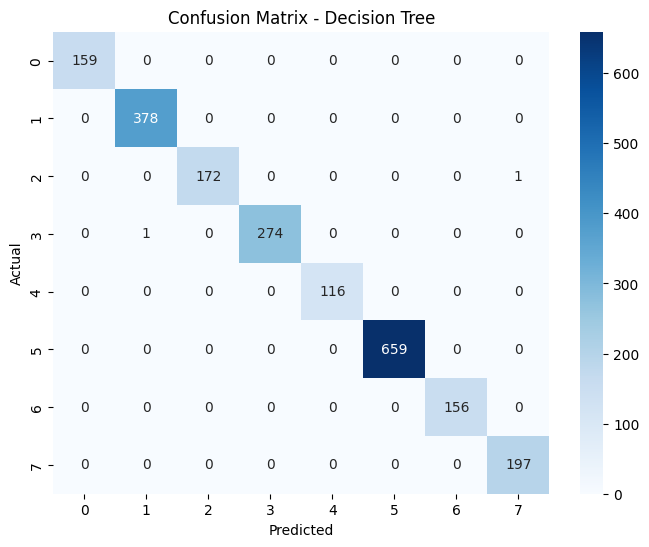

In [ ]:
# Decision Tree

# Melakukan prediksi pada data uji
y_pred_dt = dt.predict(X_test_scaled)

# Menghitung metrik evaluasi untuk Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average = 'weighted')
precision_dt = precision_score(y_test, y_pred_dt, average = 'weighted')
recall_dt = recall_score(y_test, y_pred_dt, average = 'weighted')

# Menampilkan hasil evaluasi untuk Decision Tree
print("Decision Tree:")
print("Accuracy:", accuracy_dt)
print("F1-Score:", f1_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)

# Membuat confusion matrix untuk Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest:
Accuracy: 0.995740653099858
F1-Score: 0.9957469542068255
Precision: 0.9957766718354477
Recall: 0.995740653099858


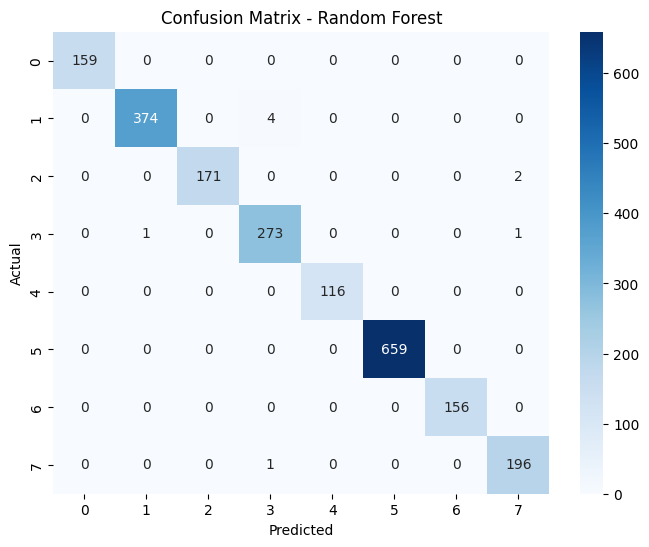

In [ ]:
# Random Forest

# Melakukan prediksi pada data uji
y_pred_rf = rf.predict(X_test_scaled)

# Menghitung metrik evaluasi untuk Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

# Menampilkan hasil evaluasi untuk Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("F1-Score:", f1_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)

# Membuat confusion matrix untuk Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

In [ ]:
# Hyperparameter grid untuk Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Menggunakan GridSearchCV untuk Decision Tree
grid_search_dt = GridSearchCV(estimator=dt,
                              param_grid=param_grid_dt,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1)
grid_search_dt.fit(X_train_scaled, y_train_resampled)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Hyperparameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Menggunakan GridSearchCV untuk Random Forest
grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train_resampled)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

In [ ]:
# Menampilkan parameter terbaik Decision Tree
print("Decision Tree Best Params:", grid_search_dt.best_params_)

Decision Tree Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Evaluasi Decision Tree setelah tuning
y_pred_dt_tuned = grid_search_dt.predict(X_test_scaled)
accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
f1_dt_tuned = f1_score(y_test, y_pred_dt_tuned, average='weighted')
precision_dt_tuned = precision_score(y_test, y_pred_dt_tuned, average='weighted')
recall_dt_tuned = recall_score(y_test, y_pred_dt_tuned, average='weighted')

print("Decision Tree (Tuned):")
print("Accuracy:", accuracy_dt_tuned)
print("F1-Score:", f1_dt_tuned)
print("Precision:", precision_dt_tuned)
print("Recall:", recall_dt_tuned)

Decision Tree (Tuned):
Accuracy: 0.9990534784666352
F1-Score: 0.9990532732146671
Precision: 0.9990571173816742
Recall: 0.9990534784666352


In [ ]:
# Menampilkan parameter terbaik Random Forest
print("Random Forest Best Params:", grid_search_rf.best_params_)

Random Forest Best Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# Evaluasi Random Forest setelah tuning
y_pred_rf_tuned = grid_search_rf.predict(X_test_scaled)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned, average='weighted')
precision_rf_tuned = precision_score(y_test, y_pred_rf_tuned, average='weighted')
recall_rf_tuned = recall_score(y_test, y_pred_rf_tuned, average='weighted')

print("Random Forest (Tuned):")
print("Accuracy:", accuracy_rf_tuned)
print("F1-Score:", f1_rf_tuned)
print("Precision:", precision_rf_tuned)
print("Recall:", recall_rf_tuned)

Random Forest (Tuned):
Accuracy: 0.9962139138665405
F1-Score: 0.9962179103696039
Precision: 0.9962333271741535
Recall: 0.9962139138665405


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [ ]:
metric_before_tuning= {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_dt, accuracy_rf],
    'F1 Score': [f1_dt, f1_rf],
    'Precision': [precision_dt, precision_rf],
    'Recall': [recall_dt, recall_rf]
}

data1 = pd.DataFrame(metric_before_tuning)
print("Metric Before Tuning:")
data1

Metric Before Tuning:


,Model,Accuracy,F1 Score,Precision,Recall
0,Decision Tree,0.999053,0.999053,0.999057,0.999053
1,Random Forest,0.995741,0.995747,0.995777,0.995741


In [ ]:
metric_after_tuning= {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_dt_tuned, accuracy_rf_tuned],
    'F1 Score': [f1_dt_tuned, f1_rf_tuned],
    'Precision': [precision_dt_tuned, precision_rf_tuned],
    'Recall': [recall_dt_tuned, recall_rf_tuned]
}

data2 = pd.DataFrame(metric_after_tuning)
print("Metric After Tuning:")
data2

Metric After Tuning:


,Model,Accuracy,F1 Score,Precision,Recall
0,Decision Tree,0.999053,0.999053,0.999057,0.999053
1,Random Forest,0.996214,0.996218,0.996233,0.996214


In [ ]:
# Mendefinisikan classification reports
report_before = classification_report(y_test, y_pred_dt, output_dict=True)
report_after = classification_report(y_test, y_pred_dt_tuned, output_dict=True)

# Membuat dataframes untuk classification reports
dt_before = pd.DataFrame(report_before).transpose()
dt_after = pd.DataFrame(report_after).transpose()

# Menggabungkan dataframes
comparison_dt = pd.concat([dt_before, dt_after], axis=1, keys=['Before Tuning', 'After Tuning'])

# Display the table
print("Classification Report for Decision Tree:")
display(comparison_dt)

Classification Report for Decision Tree:


Before Tuning                                  After Tuning  \
                 precision    recall  f1-score      support    precision   
0                 1.000000  1.000000  1.000000   159.000000     1.000000   
1                 0.997361  1.000000  0.998679   378.000000     0.997361   
2                 1.000000  0.994220  0.997101   173.000000     1.000000   
3                 1.000000  0.996364  0.998179   275.000000     1.000000   
4                 1.000000  1.000000  1.000000   116.000000     1.000000   
5                 1.000000  1.000000  1.000000   659.000000     1.000000   
6                 1.000000  1.000000  1.000000   156.000000     1.000000   
7                 0.994949  1.000000  0.997468   197.000000     0.994949   
accuracy          0.999053  0.999053  0.999053     0.999053     0.999053   
macro avg         0.999039  0.998823  0.998928  2113.000000     0.999039   
weighted avg      0.999057  0.999053  0.999053  2113.000000     0.999057   

                                               
                recall  f1-score      support  
0             1.000000  1.000000   159.000000  
1             1.000000  0.998679   378.000000  
2             0.994220  0.997101   173.000000  
3             0.996364  0.998179   275.000000  
4             1.000000  1.000000   116.000000  
5             1.000000  1.000000   659.000000  
6             1.000000  1.000000   156.000000  
7             1.000000  0.997468   197.000000  
accuracy      0.999053  0.999053     0.999053  
macro avg     0.998823  0.998928  2113.000000  
weighted avg  0.999053  0.999053  2113.000000

In [ ]:
# Mendefinisikan classification reports
report_before = classification_report(y_test, y_pred_rf, output_dict=True)
report_after = classification_report(y_test, y_pred_rf_tuned, output_dict=True)

# Membuat dataframes untuk classification reports
rf_before = pd.DataFrame(report_before).transpose()
rf_after = pd.DataFrame(report_after).transpose()

# Menggabungkan dataframes
comparison_rf = pd.concat([rf_before, rf_after], axis=1, keys=['Before Tuning', 'After Tuning'])

# Display the table
print("Classification Report for Random Forest:")
display(comparison_rf)

Classification Report for Random Forest:


Before Tuning                                  After Tuning  \
                 precision    recall  f1-score      support    precision   
0                 1.000000  1.000000  1.000000   159.000000     1.000000   
1                 0.997333  0.989418  0.993360   378.000000     0.994709   
2                 1.000000  0.988439  0.994186   173.000000     1.000000   
3                 0.982014  0.992727  0.987342   275.000000     0.989130   
4                 1.000000  1.000000  1.000000   116.000000     1.000000   
5                 1.000000  1.000000  1.000000   659.000000     1.000000   
6                 1.000000  1.000000  1.000000   156.000000     1.000000   
7                 0.984925  0.994924  0.989899   197.000000     0.984925   
accuracy          0.995741  0.995741  0.995741     0.995741     0.996214   
macro avg         0.995534  0.995689  0.995598  2113.000000     0.996096   
weighted avg      0.995777  0.995741  0.995747  2113.000000     0.996233   

                                               
                recall  f1-score      support  
0             1.000000  1.000000   159.000000  
1             0.994709  0.994709   378.000000  
2             0.988439  0.994186   173.000000  
3             0.992727  0.990926   275.000000  
4             1.000000  1.000000   116.000000  
5             0.998483  0.999241   659.000000  
6             1.000000  1.000000   156.000000  
7             0.994924  0.989899   197.000000  
accuracy      0.996214  0.996214     0.996214  
macro avg     0.996160  0.996120  2113.000000  
weighted avg  0.996214  0.996218  2113.000000

**Observasi**

Peningkatan Keseluruhan: Kedua model menunjukkan sedikit peningkatan di semua metrik (akurasi, F1-score, presisi, dan recall) setelah melakukan hyperparameter tuning. Ini menunjukkan bahwa tuning bermanfaat, meskipun tidak signifikan.

Model Random Forest secara konsisten mengungguli model Decision Tree di semua metrik, baik sebelum maupun sesudah tuning. Ini terjadi karena Random Forest umumnya lebih kuat dan lebih tahan terhadap overfitting.




**Decision Tree**

Secara keseluruhan, model Decision Tree sebelum tuning memiliki kinerja yang sangat baik, dengan akurasi, precision, recall, dan f1-score mendekati 1.00 untuk semua kelas.

Kesimpulan:
- Decision Tree sebelum tuning menunjukkan kinerja yang sangat baik.
- Tuning tidak memberikan peningkatan signifikan.


**Random Forest**

Secara umum, model Random Forest sebelum tuning memiliki kinerja yang sangat baik, dengan akurasi, precision, recall, dan f1-score mendekati 1.00 untuk semua kelas. Ini menunjukkan bahwa model mampu mengklasifikasikan tipe pelanggan dengan sangat akurat.

Kesimpulan:
- Random Forest sebelum tuning menunjukkan kinerja yang sangat baik.
- Tuning tidak memberikan peningkatan signifikan.

**Rekomendasi Lebih Lanjut**

1. Atasi Ketidakseimbangan Kelas: Meskipun telah menggunakan SMOTE untuk oversampling, perlu dilihat kembali apakah ketidakseimbangan kelas masih berdampak signifikan pada hasil, terutama untuk kelas minoritas.

2. Rekayasa Fitur: Coba bereksperimen dengan membuat fitur baru atau mengubah fitur yang ada untuk melihat apakah dapat meningkatkan kemampuan model untuk mempelajari pola.

3. Mencoba Algoritma Lain: Pertimbangkan untuk mencoba algoritma klasifikasi lain seperti Support Vector Machines (SVM), Gradient Boosting (XGBoost), atau K-Nearest Neighbors (KNN) untuk melihat apakah algoritma-algoritma tersebut mencapai kinerja yang lebih baik.

4. Validasi Silang (Cross Validation) : Gunakan teknik seperti validasi silang k-fold untuk mendapatkan perkiraan kinerja model yang lebih kuat.

5. Menambah Lebih Banyak Data: Jika memungkinkan, mengumpulkan lebih banyak data, terutama untuk kelas yang kurang terwakili, seringkali dapat menghasilkan model yang lebih akurat dan andal.